In [1]:
import cv2
from darkflow.net.build import TFNet
import numpy as np
import time
from time import time as timer

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
option = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.25,
    'gpu': 0.0
}

tfnet = TFNet(option)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.04152989387512207s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

# Processing Images (1)

In [12]:
# read the color image and covert to RGB

#img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# B & W image (using red channel only)
img = np.stack((img[:,:,0],img[:,:,0],img[:,:,0]),axis=2)

# use YOLO to predict the image
result = tfnet.return_predict(img)

result

[{'bottomright': {'x': 573, 'y': 478},
  'confidence': 0.7921693,
  'label': 'bicycle',
  'topleft': {'x': 62, 'y': 102}},
 {'bottomright': {'x': 697, 'y': 168},
  'confidence': 0.80981654,
  'label': 'truck',
  'topleft': {'x': 464, 'y': 80}},
 {'bottomright': {'x': 334, 'y': 539},
  'confidence': 0.8120595,
  'label': 'dog',
  'topleft': {'x': 128, 'y': 214}}]

In [13]:
img.shape

(576, 768, 3)

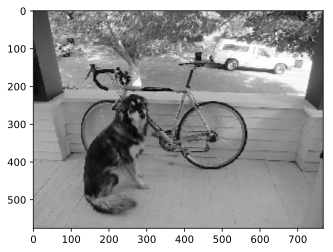

In [14]:
plt.imshow(img)
plt.show()

(62, 102)
(573, 478)


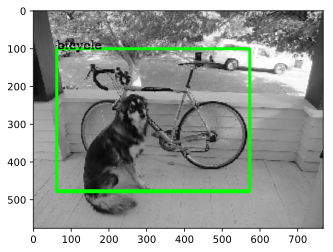

In [15]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
print(tl)
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
print(br)
label = result[0]['label']

# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

## Pre-process (a)

Elapsed time = 1.0978925228118896 s


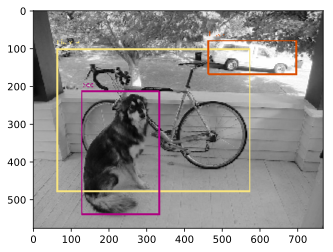

In [16]:
#img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#result = tfnet.return_predict(img)

# B & W image (using red channel only)
img = np.stack((img[:,:,0],img[:,:,0],img[:,:,0]),axis=2)

start = timer()

preprocessed = tfnet.framework.preprocess(img)
feed_dict = {tfnet.inp: [preprocessed]}
net_out = tfnet.sess.run(tfnet.out,feed_dict)[0]

processed = tfnet.framework.postprocess(net_out, img, False)

cv2.imwrite('out_dog.jpg', processed)
print('Elapsed time = ' + str(timer() - start) + ' s')

'''
fig = plt.figure(1)
fig.gca().imshow(processed)
plt.show()
'''

plt.imshow(processed)
plt.show()

## Pre-process (b)

Elapsed time = 1.1056880950927734 s


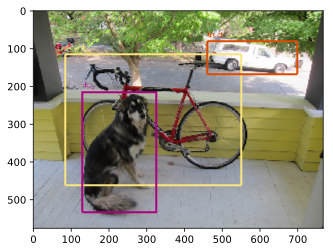

In [17]:
#img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#result = tfnet.return_predict(img)

# B & W image (using red channel only)
#img = np.stack((img[:,:,0],img[:,:,0],img[:,:,0]),axis=2)

start = timer()

buffer_inp = list()
buffer_pre = list()
    
preprocessed = tfnet.framework.preprocess(img)

buffer_inp.append(img)
buffer_pre.append(preprocessed)

feed_dict = {tfnet.inp: buffer_pre}
net_out = tfnet.sess.run(tfnet.out,feed_dict)[0]

processed = tfnet.framework.postprocess(net_out, img, False)

cv2.imwrite('out_dog.jpg', processed)
print('Elapsed time = ' + str(timer() - start) + ' s')

'''
fig = plt.figure(1)
fig.gca().imshow(processed)
plt.show()
'''

plt.imshow(processed)
plt.show()

## Pre-process (c)

[{'label': 'bicycle', 'topleft': {'y': 102, 'x': 62}, 'confidence': 0.7921693, 'bottomright': {'y': 478, 'x': 573}}, {'label': 'truck', 'topleft': {'y': 80, 'x': 464}, 'confidence': 0.80981654, 'bottomright': {'y': 168, 'x': 697}}, {'label': 'dog', 'topleft': {'y': 214, 'x': 128}, 'confidence': 0.8120595, 'bottomright': {'y': 539, 'x': 334}}]
Elapsed time = 2.452004909515381 s


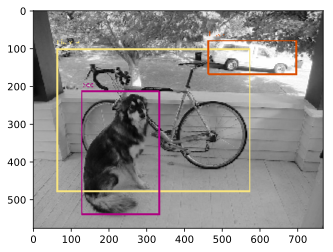

In [18]:
#img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# B & W image (using red channel only)
img = np.stack((img[:,:,0],img[:,:,0],img[:,:,0]),axis=2)

start = timer()

h, w, _ = img.shape

'''
img = tfnet.framework.resize_input(img)
this_inp = np.expand_dims(img, 0)
feed_dict = {tfnet.inp : this_inp}
'''

preprocessed = tfnet.framework.preprocess(img)
feed_dict = {tfnet.inp: [preprocessed]}

net_out = tfnet.sess.run(tfnet.out, feed_dict)[0]
processed = tfnet.framework.postprocess(net_out, img, False)

###############
# Boxes Info  #
###############
out = tfnet.sess.run(tfnet.out, feed_dict)[0]
boxes = tfnet.framework.findboxes(out)

threshold = tfnet.FLAGS.threshold

boxesInfo = list()
#
for box in boxes:
    tmpBox = tfnet.framework.process_box(box, h, w, threshold)
    if tmpBox is None:
        continue
    boxesInfo.append({
        "label": tmpBox[4],
        "confidence": tmpBox[6],
        "topleft": {
            "x": tmpBox[0],
            "y": tmpBox[2]},
        "bottomright": {
            "x": tmpBox[1],
            "y": tmpBox[3]}
    })
#
print(boxesInfo)
#

cv2.imwrite('out_dog.jpg', processed)
print('Elapsed time = ' + str(timer() - start) + ' s')

plt.imshow(processed)
plt.show()

# Processing Images (2)

In [19]:
colors = [tuple(255 * np.random.rand(3)) for i in range(7)]  #range(100)

for color in colors:
    print(color)

(68.87017857530226, 118.60473107852394, 78.52019451800341)
(187.73322339743544, 102.13665262044184, 142.27093355575596)
(165.52450222382166, 125.43723500762277, 190.87681690744395)
(153.4121790264669, 107.23718088336888, 116.97392518178366)
(62.880900212371955, 155.75496377775448, 37.073035203850694)
(94.25894167602716, 143.24031741573629, 14.321624979966298)
(142.10529015366976, 212.61640110496, 22.08606407975687)


{'label': 'bicycle', 'topleft': {'y': 115, 'x': 85}, 'confidence': 0.79921085, 'bottomright': {'y': 462, 'x': 550}}
{'label': 'truck', 'topleft': {'y': 82, 'x': 461}, 'confidence': 0.8184496, 'bottomright': {'y': 168, 'x': 698}}
{'label': 'dog', 'topleft': {'y': 215, 'x': 130}, 'confidence': 0.8198157, 'bottomright': {'y': 534, 'x': 326}}
FPS 0.9


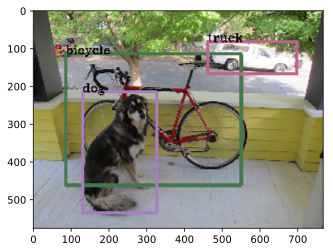

In [20]:
# read the color image and covert to RGB

stime = time.time()
img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
#img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# B & W image (using red channel only)
#img = np.stack((img[:,:,0],img[:,:,0],img[:,:,0]),axis=2)

results = tfnet.return_predict(img)

for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 7)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    print(result)
    
cv2.imshow('img', img)
print('FPS {:.1f}'.format(1 / (time.time() - stime)))  # Frame per seconds

plt.imshow(img)
plt.show()